In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [3]:
x = np.array([0, 1, 3, 100, 200])
y = np.array([0, 100, 201, 180, 210])

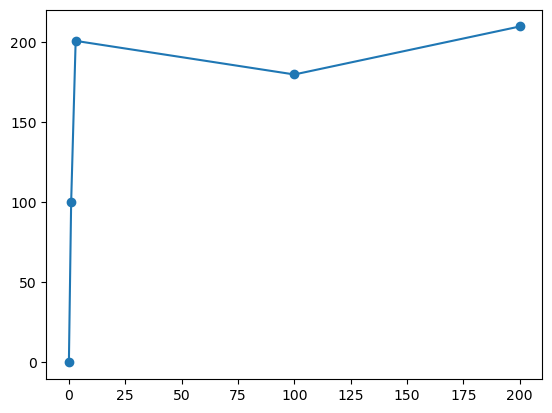

In [4]:
plt.plot(x, y, 'o-')

In [7]:
dist_along = np.hstack(([0, ], np.cumsum((np.diff(x) ** 2 + np.diff(y) ** 2) ** 0.5)))
dist_along

array([  0.        , 100.00499988, 201.02479991, 300.27196612,
       404.67503121])

In [10]:
xlin = interp1d(dist_along, x)
ylin = interp1d(dist_along, y)

In [17]:
xsq = interp1d(dist_along, x, kind="quadratic")
ysq = interp1d(dist_along, y, kind="quadratic")

In [24]:
xcube = interp1d(dist_along, x, kind="cubic")
ycube = interp1d(dist_along, y, kind="cubic")

In [27]:
xlin(np.linspace(dist_along[0], dist_along[-1], 11))

array([  0.        ,   0.4046548 ,   0.8093096 ,   1.42363001,
         2.22480964,   4.28299302,  43.8342261 ,  83.38545918,
       122.47832363, 161.23916181, 200.        ])

In [35]:
np.testing.assert_array_almost_equal(
    x,
    xsq(dist_along),
)

In [65]:
npts = len(x) * 3 - 1
new_dist_nodes = np.linspace(dist_along[0], dist_along[-1], npts)
old_dist_nodes = dist_along
interp_to = np.sort(np.unique(np.hstack([new_dist_nodes, old_dist_nodes])))
interp_to

array([  0.        ,  31.12884855,  62.25769711,  93.38654566,
       100.00499988, 124.51539422, 155.64424277, 186.77309133,
       201.02479991, 217.90193988, 249.03078844, 280.15963699,
       300.27196612, 311.28848555, 342.4173341 , 373.54618266,
       404.67503121])

In [66]:
xlinsq = interp1d(interp_to, xlin(interp_to), kind="quadratic")
ylinsq = interp1d(interp_to, ylin(interp_to), kind="quadratic")

In [67]:
new_dist_nodes = np.linspace(dist_along[0], dist_along[-1], 2 * npts)
old_dist_nodes = dist_along
interp_to2 = np.sort(np.unique(np.hstack([new_dist_nodes, old_dist_nodes, interp_to])))
interp_to2

array([  0.        ,  14.98796412,  29.97592824,  31.12884855,
        44.96389236,  59.95185648,  62.25769711,  74.93982059,
        89.92778471,  93.38654566, 100.00499988, 104.91574883,
       119.90371295, 124.51539422, 134.89167707, 149.87964119,
       155.64424277, 164.86760531, 179.85556943, 186.77309133,
       194.84353355, 201.02479991, 209.83149766, 217.90193988,
       224.81946178, 239.8074259 , 249.03078844, 254.79539002,
       269.78335414, 280.15963699, 284.77131826, 299.75928238,
       300.27196612, 311.28848555, 314.7472465 , 329.73521062,
       342.4173341 , 344.72317473, 359.71113885, 373.54618266,
       374.69910297, 389.68706709, 404.67503121])

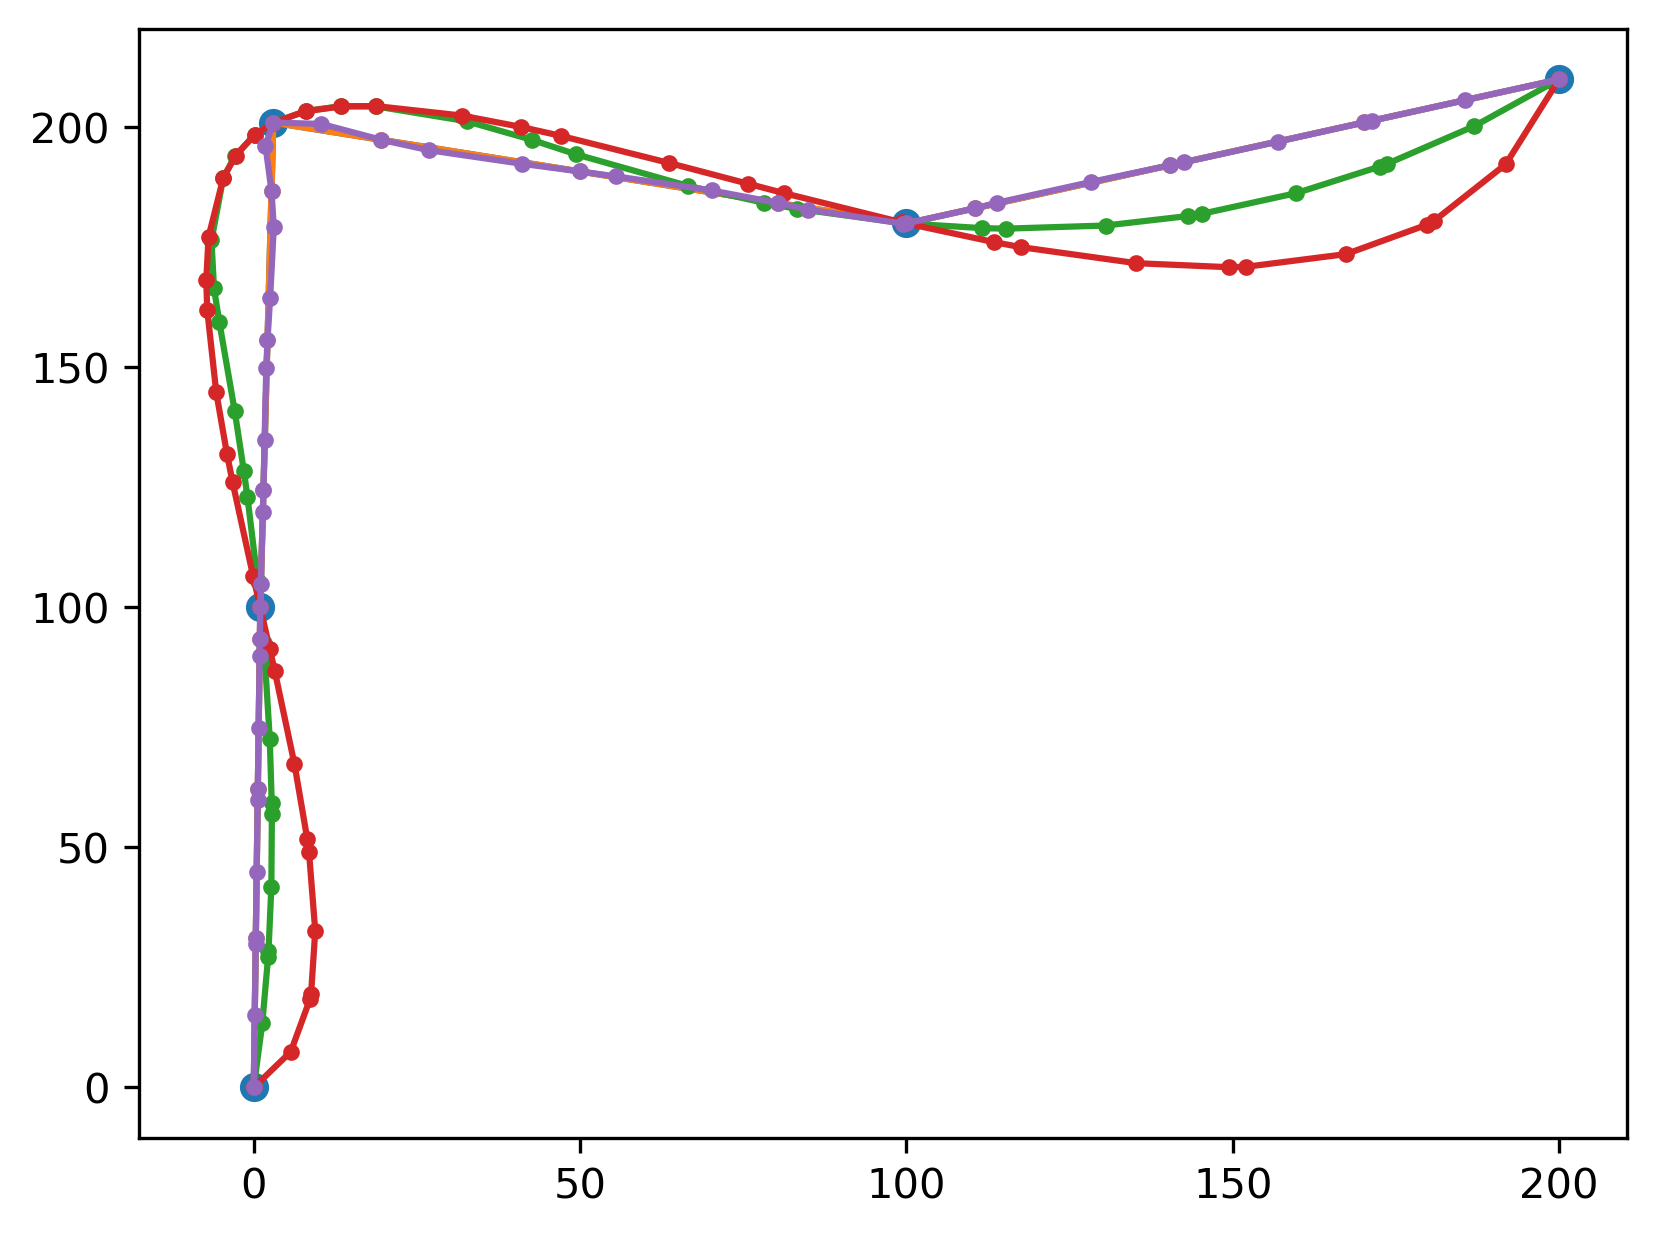

In [70]:
fig, ax = plt.subplots(1, 1)
fig.set_dpi(300)
ax.plot(x, y, 'o-')
ax.plot(
    xlin(interp_to),
    ylin(interp_to),
    '.-',
)
ax.plot(
    xsq(interp_to2),
    ysq(interp_to2),
    '.-',
)
ax.plot(
    xcube(interp_to2),
    ycube(interp_to2),
    '.-',
)
ax.plot(
    xlinsq(interp_to2),
    ylinsq(interp_to2),
    '.-',
)